# Practica 2

**Objetivo:** A partir del [corpus proporcionado](./../99_corpus/corpusML.txt) realizar un modelo del lenguaje neuronal con base en la arquitectura propuesta por Bengio (2003).

In [1]:
from re import sub
from unicodedata import normalize
from nltk.stem.snowball import SpanishStemmer
from sklearn.model_selection import train_test_split
from itertools import chain
from collections import Counter,defaultdict
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd

# Definimos funcion de apoyo para imprimir ejemplos de los corpus
def ejemplos(msg, collection, n_elements):
    print(msg)
    for element in collection[:n_elements]:
        print(element)

## 1. Limpiar los textos y aplicar stemming a las palabras.

In [2]:
# Abrir el documento
document = './../99_corpus/corpusML.txt'
text = open(document,'r',encoding='utf-8').read()

In [3]:
# Definimos funcion para limpiar texto
def please_clean_my_text(text):
    text_clean = ""
    lines = []

    for line in text.split("\n"):
        # Eliminamos caracteres compuestos y pasamos a minusculas
        line = normalize('NFKC', line).lower()
        # Eliminamos extensiones y numeros
        line = sub(r"\\.*|{.*}|\\|\[.*\]|[!-@[-`{-~]", ' ', line)
        # Eliminamos signos de puntuacion
        line = sub(r"[^\w]", " ", line)
        # Eliminamos saltos de linea
        line = " ".join(line.split())
        # Si la linea no esta vacia la añadimos al texto limpio
        if line:
            lines.append(line)
            
    return lines

In [4]:
# Limpiamos el documento
lines = please_clean_my_text(text)
ejemplos("### Lineas de ejemplo ###\n", lines, 5)

### Lineas de ejemplo ###

comencé a trabajar y me pegaron me maltrataron con chicote
mis patrones me pegaron porque no me quería apurar porque era flojo
por eso me habían pegado
cuando me pegaban ya entonces me quitaba
pues entonces no quise trabajar


In [5]:
# Definimos el stemmer
def please_stem_my_text(lines):
    # Debido a que el corpus se encuentra en español, utilizaremos el stemmer de NLTK para español.
    stemmer = SpanishStemmer()
    stems = []
    for line in lines:
        stems.append([stemmer.stem(word) for word in line.split(" ")])
    return stems

In [6]:
# Aplicamos Stemming a los tokens limpios
stems = please_stem_my_text(lines)
ejemplos("### Lineas de ejemplo ###\n", stems, 10)

### Lineas de ejemplo ###

['comenc', 'a', 'trabaj', 'y', 'me', 'peg', 'me', 'maltrat', 'con', 'chicot']
['mis', 'patron', 'me', 'peg', 'porqu', 'no', 'me', 'quer', 'apur', 'porqu', 'era', 'floj']
['por', 'eso', 'me', 'hab', 'peg']
['cuand', 'me', 'peg', 'ya', 'entonc', 'me', 'quit']
['pues', 'entonc', 'no', 'quis', 'trabaj']
['ya', 'no', 'quis', 'estar', 'com', 'me', 'peg']
['despues', 'ya', 'estuv', 'nomas', 'en', 'mi', 'cas']
['fui', 'a', 'junt', 'cac', 'de', 'caball']
['fui', 'a', 'junt', 'caquit', 'de', 'caball']
['se', 'me', 'avent', 'las', 'culebr']


In [7]:
# Separación del corpus en prueba (70%) y evaluación (30%)
train_corpus, eval_corpus = train_test_split(stems, test_size=0.3)

## 2. Insertar símbolos de inicio y final de cadena.

In [8]:
# Definimos los simbolos
BOS = '<BOS>'
EOS = '<EOS>'
UNK = '<UNK>'

In [9]:
# Definamos una función para sustituir los hapax, esta funcion recibe un corpus
def replace_hapax(corpus):
    # Obtenemos las frecuencias de las palabras del corpus
    freqs = Counter( chain(*[' '.join(sent).split() for sent in corpus]) )

    # Sustituimos los hápax por UNK en las palabras con frecuencia = 1
    corpus_unk = []

    for line in corpus:
        new_line = []
        for word in line:
            # Si la frecuencia de la palabra = 1, es un hapáx
            if freqs[word] == 1:
                new_line.append(UNK)
            # Si no, añadimos la palabra original
            else:
                new_line.append(word)
        corpus_unk.append(new_line)
    return corpus_unk

In [10]:
# Sustituimos los hápax en los corpus

corpus_unk = []
corpus_unk = replace_hapax(train_corpus)
ejemplos("### Lineas de ejemplo con simbolos <UNK> ###", corpus_unk, 10)

### Lineas de ejemplo con simbolos <UNK> ###
['se', 'le', 'termin', 'de', '<UNK>']
['las', '<UNK>', 'a', 'las', 'dos', 'a', 'tu', '<UNK>', 'y', 'a', '<UNK>']
['le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit']
['cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr']
['hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm']
['solt', 'el', '<UNK>', 'de', '<UNK>', 'que', 'carg', 'mi', 'difunt', 'padrecit']
['he', 'ven', 'he', 'camin', 'medi', '<UNK>']
['no', 'lo', 'han', 'de', 'troz', 'pues', 'troz', 'asi', 'dic']
['o', 'era', 'el', 'que', 'le', 'dec', 'san', '<UNK>']
['pues', 'se', 'embarr', 'de', 'lod', 'otra', 'vez']


In [11]:
# Definamos una función para insertar los BOS y EOS
def insert_simbols_of_sentence(corpus):
    corpus_w_simbols = [ [BOS] + line + [EOS] for line in corpus ]
    return corpus_w_simbols

In [12]:
# Insertamos BOS y EOS
corpus_w_simbols = []
corpus_w_simbols = insert_simbols_of_sentence(corpus_unk)
ejemplos(" ### Lineas de ejemplo del corpus don simbolos ###", corpus_w_simbols, 10)

 ### Lineas de ejemplo del corpus don simbolos ###
['<BOS>', 'se', 'le', 'termin', 'de', '<UNK>', '<EOS>']
['<BOS>', 'las', '<UNK>', 'a', 'las', 'dos', 'a', 'tu', '<UNK>', 'y', 'a', '<UNK>', '<EOS>']
['<BOS>', 'le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit', '<EOS>']
['<BOS>', 'cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr', '<EOS>']
['<BOS>', 'hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm', '<EOS>']
['<BOS>', 'solt', 'el', '<UNK>', 'de', '<UNK>', 'que', 'carg', 'mi', 'difunt', 'padrecit', '<EOS>']
['<BOS>', 'he', 'ven', 'he', 'camin', 'medi', '<UNK>', '<EOS>']
['<BOS>', 'no', 'lo', 'han', 'de', 'troz', 'pues', 'troz', 'asi', 'dic', '<EOS>']
['<BOS>', 'o', 'era', 'el', 'que', 'le', 'dec', 'san', '<UNK>', '<EOS>']
['<BOS>', 'pues', 'se', 'embarr', 'de', 'lod', 'otra', 'vez', '<EOS>']


## 3. Obtener los bigramas que aparecen en el texto (indexar numéricamente).

In [13]:
# Definamos una función para indexar numericamente
def corpus2index(corpus):
    # Creamos un diccionario para los stems
    vocab = defaultdict()
    vocab.default_factory = lambda: len(vocab)

    # Creamos el corpus con sus indices
    corpus_ids = [[vocab[word] for word in line] for line in corpus]
    return corpus_ids, vocab

# Definamos una funcion para obtener el diccionario de indice:palabra
def dicKeyWord(vocab):
    return { idx: w for w,idx in vocab.items()}

# Definamos una funcion para obtener el diccionario de palabra:indice
def dicWordKey(vocab):
    return { w: idx for w,idx in vocab.items()}

In [14]:
# Indexamos numericamente los stems

corpus_ids, corpus_vocab = corpus2index(corpus_w_simbols)
ejemplos("Oraciones en corpus con simbolos", corpus_w_simbols, 10)
ejemplos("\nPalabras en indexadas", corpus_ids, 10)

# Creamos los diccionarios key:word para recuperar posteriormente
dic_kw_train = dicKeyWord(corpus_vocab)
# Creamos los diccionarios word:key para recuperar posteriormente
dic_wk_train = dicWordKey(corpus_vocab)

Oraciones en corpus con simbolos
['<BOS>', 'se', 'le', 'termin', 'de', '<UNK>', '<EOS>']
['<BOS>', 'las', '<UNK>', 'a', 'las', 'dos', 'a', 'tu', '<UNK>', 'y', 'a', '<UNK>', '<EOS>']
['<BOS>', 'le', 'dig', 'le', 'vas', 'a', 'met', 'su', 'maicit', '<EOS>']
['<BOS>', 'cuand', 'hub', 'sab', 'alla', 'en', 'el', 'centr', 'pues', 'me', 'han', 'mand', 'a', 'fabric', 'piedr', '<EOS>']
['<BOS>', 'hast', 'le', 'dir', 'entonc', 'en', 'le', 'dia', 'no', 'te', 'duerm', '<EOS>']
['<BOS>', 'solt', 'el', '<UNK>', 'de', '<UNK>', 'que', 'carg', 'mi', 'difunt', 'padrecit', '<EOS>']
['<BOS>', 'he', 'ven', 'he', 'camin', 'medi', '<UNK>', '<EOS>']
['<BOS>', 'no', 'lo', 'han', 'de', 'troz', 'pues', 'troz', 'asi', 'dic', '<EOS>']
['<BOS>', 'o', 'era', 'el', 'que', 'le', 'dec', 'san', '<UNK>', '<EOS>']
['<BOS>', 'pues', 'se', 'embarr', 'de', 'lod', 'otra', 'vez', '<EOS>']

Palabras en indexadas
[0, 1, 2, 3, 4, 5, 6]
[0, 7, 5, 8, 7, 9, 8, 10, 5, 11, 8, 5, 6]
[0, 2, 12, 2, 13, 8, 14, 15, 16, 6]
[0, 17, 18, 19, 20

In [15]:
# Definamos una función para crear los bigrama
def corpus2bigrams(corpus):
    bigrams = list(chain(*[zip(cad,cad[1:]) for cad in corpus]))
    return bigrams

In [16]:
# Obtencion de los bigramas
bigrams = []
bigrams = corpus2bigrams(corpus_ids)
print("Número de bigramas:", len(bigrams))
print("\nEjemplos de bigramas\n", bigrams[:50])

Número de bigramas: 6858

Ejemplos de bigramas
 [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (0, 7), (7, 5), (5, 8), (8, 7), (7, 9), (9, 8), (8, 10), (10, 5), (5, 11), (11, 8), (8, 5), (5, 6), (0, 2), (2, 12), (12, 2), (2, 13), (13, 8), (8, 14), (14, 15), (15, 16), (16, 6), (0, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 8), (8, 28), (28, 29), (29, 6), (0, 30), (30, 2), (2, 31), (31, 32), (32, 21), (21, 2), (2, 33), (33, 34)]


## 4. Entrenar con los bigramas la red neuronal y obtener los valores para los hiperparámetros. Tomar de 100 unidades para la primera capa oculta (capa lineal) y 300 para la segunda capa oculta (capa con tanh).`

In [17]:
class Bengio:
    # Constructor del objeto
    def __init__(self, bigrams, T, d, m, n, N):
        self.bigrams = bigrams
        self.T = T    # Numero de iteraciones
        self.d = d    # Dimension de los embeddings
        self.m = m    # Numero de unidades en la capa oculta
        self.n = n    # Rango de aprendizaje
        self.N = N    # Tamaño del vocabulario
    
    # Inicializamos parametros del modelo
    def initialize_params(self):
        # Matriz de representacion lineal en la primera capa oculta, C ∈ R^(d×N)
        self.C = np.random.random((self.d, self.N))/np.sqrt(self.N)
        # Matriz de pesos en la segunda capa oculta, W ∈ R^(m×d)
        self.W = np.random.random((self.m, self.d))/np.sqrt(self.d)
        # Bias, b ∈ R^m
        self.b = np.random.random(self.m)
        # Matriz de pesos en la capa de salida, U ∈ R^(N×m)
        self.U = np.random.random((self.N, self.m))/np.sqrt(self.m)
        # Bias, c ∈ R^m
        self.c = np.random.random(self.N)
        # Riesgo
        self.R = []
        self.R_it = 0
    
    # Definimos los pasos de forward
    def forward(self, i_x):
        # Capa de embedding
        c_i = self.C[:,i_x]
        # Capa oculta
        h_i = np.tanh(np.dot(self.W, c_i) + self.b)
        # Capa de salida (Softmax)
        # -> Pre-activacion
        a_i = np.dot(self.U, h_i) + self.c
        # -> Activacion
        e_a = np.exp(a_i - a_i.max())
        p_wk_wi = e_a / e_a.sum()
        
        return (p_wk_wi, h_i)
    
    # Definimos la funcion de riesgo
    def risk(self, p_wk_wi, i_y):
        # Entropia cruzada
        self.R_it -= np.log(p_wk_wi[i_y].sum())
    
    # Definimos la funcion para guardar la entropia al final de la iteracion
    def saveRisk(self):
        self.R.append(self.R_it)
    
    # Definimios la funcion para obtener el historial de la entropia cruzada
    def getRisk(self):
        return self.R

    # Definimos los pasos de backward (backpropagation)
    def backward(self, i_y, p_wk_wi, h_i):
        # Capa de salida
        d_out = np.array(p_wk_wi, copy=True) 
        d_out[i_y] -= 1
        # Capa oculta
        d_h = (1 - (h_i*h_i)) * np.dot(d_out.T, self.U)
        # Capa de embedding
        d_c = np.dot(d_h.T, self.W)
        
        return (d_out, d_h, d_c)
    
    # Definimos la actualización de pesos (gradiente descendente)
    def updateWeights(self, d_out, h_i, d_h, d_c, i_x):
        # Capa de salida
        self.U -= self.n * np.outer(d_out, h_i)
        # Capa oculta
        self.W -= self.n * np.outer(d_h, self.C[:, i_x])
        self.c -= self.n * d_out
        #self.c -= self.n * d_h
        # Capa de embedding
        self.C[:, i_x] -=  self.n * d_c
        self.b -= self.n * d_h
        #self.b -= self.n * d_c
    
    # Definimos el entrenamiento
    def train(self):
        for it in range(0, self.T):
            self.R_it = 0
            for pair in self.bigrams:
                # Separamos el bigrama en la palabra y la clase
                i_x = pair[0]
                i_y = pair[1]
                # Forward
                p_wk_wi, h_i = self.forward(i_x)
                # Funcion de riesgo
                self.risk(p_wk_wi, i_y)
                # Backward
                d_out, d_h, d_c = self.backward(i_y, p_wk_wi, h_i)
                # Actualizacion de pesos
                self.updateWeights(d_out, h_i, d_h, d_c, i_x)
            # Guardamos el historial de la entropia cruzada
            self.saveRisk()
            print("Epoch: ", it, "\tEntropia cruzada: ", self.R_it)
        print("### Ha terminado el entrenamiento ###")
    
    # Definimos funcion para obtener la entropia de una frase
    def entropy_phrase(self, sentence):
        entropy = 0
        for pair in sentence:
            i_x = pair[0]
            i_y = pair[1]
            p_wk_wi, h_i = self.forward(i_x)
            entropy -= np.log(p_wk_wi[i_y].sum())
        return entropy
    
    # Definimos funcion para la siguiente palabra
    def predict(self, i_x):
        return np.argmax(self.forward(i_x)[0])

In [18]:
# Definimos hiperparametros de la red
T = 100    # Numero de iteraciones
d = 100    # Dimension de los embeddings
m = 300    # Numero de unidades en la capa oculta
n = 0.1    # Rango de aprendizaje
N = len(corpus_vocab) # Tamaño del vocabulario

print("Tamaño del vocabulario: ", N)

Tamaño del vocabulario:  503


In [19]:
# Creamos objeto del modelo y lo entrenamos
modelo = Bengio(bigrams, T, d, m, n, N)
modelo.initialize_params()
modelo.train()

Epoch:  0 	Entropia cruzada:  33586.549134432025
Epoch:  1 	Entropia cruzada:  30922.881469286094
Epoch:  2 	Entropia cruzada:  29703.584217690015
Epoch:  3 	Entropia cruzada:  28719.065103379904
Epoch:  4 	Entropia cruzada:  27932.39637496022
Epoch:  5 	Entropia cruzada:  27328.17269855579
Epoch:  6 	Entropia cruzada:  26878.297713209868
Epoch:  7 	Entropia cruzada:  26552.76725979675
Epoch:  8 	Entropia cruzada:  26343.445557783092
Epoch:  9 	Entropia cruzada:  26182.164768270202
Epoch:  10 	Entropia cruzada:  26089.04340075199
Epoch:  11 	Entropia cruzada:  26012.623109096396
Epoch:  12 	Entropia cruzada:  25963.91857851267
Epoch:  13 	Entropia cruzada:  25922.302168164442
Epoch:  14 	Entropia cruzada:  25896.585801587
Epoch:  15 	Entropia cruzada:  25920.24085546113
Epoch:  16 	Entropia cruzada:  25930.79425773299
Epoch:  17 	Entropia cruzada:  25877.80540661469
Epoch:  18 	Entropia cruzada:  25853.585236963125
Epoch:  19 	Entropia cruzada:  25911.044924976606
Epoch:  20 	Entropia 

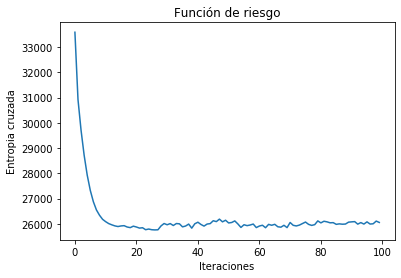

In [20]:
# Vemos como se fue ajustando la funcion de riesgo
plt.plot(modelo.getRisk())
plt.xlabel("Iteraciones")
plt.ylabel("Entropia cruzada")
plt.title("Función de riesgo")
plt.show()

## 5. Obtener las matrices A y Π a partir de las salidas de la red neuronal (probabilidad Softmax).

Modelo de lenguaje μ = (Σ,A,Π)

Σ es un conjunto de símbolos o vocabulario

A = (a_ij) = p(wj|wi) son las probabilidades de transicion de los 
bigramas

Π = (πi) = p(wi) son las probabilidades iniciales.

In [21]:
# Numero de tipos sin contar las etiqeutas BOS y EOS
n_tipos = N

# La matriz A es de NxN+1, los renglones consideran EOS
A = np.zeros((n_tipos,n_tipos))
print("Matriz A, tamaño ", A.shape)

# Pi es del tamaño de los tipos
Pi = np.zeros(n_tipos)
print("Matriz Pi, tamaño ", Pi.shape)

Matriz A, tamaño  (503, 503)
Matriz Pi, tamaño  (503,)


In [22]:
# Calculamos las matrices
for bigram in bigrams:
    #Se llena el tensor de transiciones con frecuencias
    i_x = bigram[0]
    i_y = bigram[1]
    if dic_kw_train[i_x] != BOS:
        A[bigram] = modelo.forward(i_x)[0][i_y]
    # Se obtienen las frecuencias de iniciales
    elif dic_kw_train[i_x] == BOS:
        Pi[i_y] = modelo.forward(i_y)[0][i_y]

In [23]:
# Visualicemos la matriz A
labelsColsA = list(corpus_vocab.keys())[:N]
labelsRowsA = list(corpus_vocab.keys())[:N]
matA = pd.DataFrame(A, index=labelsColsA, columns=labelsRowsA)
display(matA)

,<BOS>,se,le,termin,de,<UNK>,<EOS>,las,a,dos,...,cincel,alegr,cont,poquit,otro,trayend,choz,mil,veinticinc,chent
<BOS>,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
se,0.0,0.000000,0.002007,0.015552,0.000000,0.062207,0.000000,0.000266,0.001430,0.0,...,0.0,0.019578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
le,0.0,0.003569,0.000000,0.001726,0.000000,0.008159,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
termin,0.0,0.000000,0.000000,0.000000,0.052651,0.000000,0.007104,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
de,0.0,0.000000,0.000000,0.000000,0.000000,0.054580,0.000000,0.000000,0.000196,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trayend,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.008188,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
choz,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mil,0.0,0.000000,0.000000,0.000000,0.262957,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
veinticinc,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


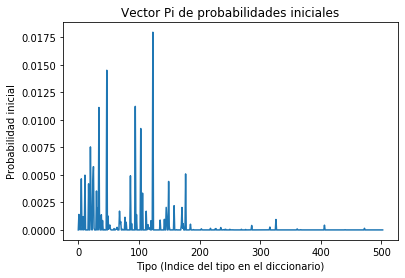

,<BOS>
<BOS>,0.000000
se,0.001406
le,0.000455
termin,0.000000
de,0.001052
...,...
trayend,0.000000
choz,0.000000
mil,0.000000
veinticinc,0.000000


In [24]:
# Veamos los valores de Pi
plt.plot(Pi)
plt.xlabel("Tipo (Indice del tipo en el diccionario)")
plt.ylabel("Probabilidad inicial")
plt.title("Vector Pi de probabilidades iniciales")
plt.show()

# print(Pi)

labelsColsPi = list(corpus_vocab.keys())[:N]
matPi = pd.DataFrame(Pi, index=labelsColsPi, columns=[BOS])
display(matPi)

## 6. Evaluar el modelo (con Entropía).

In [25]:
entropy_phrase = 0
cont = 0

for line in eval_corpus:
    # Obtenemos los indices de las palabras de evaluacion
    # Las palabras que no esten en el diccionario  las trataremos como UNK
    ids_tmp = []
    for word in line:
        ids_tmp.append(dic_wk_train.get(word, dic_wk_train.get(UNK)))
    
    # Obtenemos los bigramas de esta sentencia
    bigrams_tmp = []
    bigrams_tmp = list(zip(ids_tmp, ids_tmp[1:]))
    
    # Obtenemos la entropia de la frase
    entropy_phrase += modelo.entropy_phrase(bigrams_tmp)
    
    if (cont%100) == 0:
        print("### Linea ", cont+0, " ###")
        print(line)
        print("\nPalabras predecidas")
        predicts = []
        for idx in ids_tmp:
            predict = dic_kw_train[modelo.predict(idx)]
            current = dic_kw_train[idx]
            print(current, " -> ", predict)
        print("\n")
        
    cont+=1

entropy_phrase /= len(eval_corpus)
print("Entropia del modelo evaluado: ", entropy_phrase)

### Linea  0  ###
['no', 'quer', 'que', 'vin', 'y', 'que', 'me', 'vier']

Palabras predecidas
no  ->  tien
quer  ->  ir
que  ->  a
vin  ->  a
y  ->  com
que  ->  a
me  ->  llev
<UNK>  ->  <EOS>


### Linea  100  ###
['si', 'hab', 'much', 'de', 'eso']

Palabras predecidas
si  ->  pues
hab  ->  en
much  ->  dos
de  ->  tu
eso  ->  pues


### Linea  200  ###
['se', 'ha', 'amorat', 'mi', 'man']

Palabras predecidas
se  ->  fueron
ha  ->  mat
<UNK>  ->  <EOS>
mi  ->  <UNK>
man  ->  <EOS>


### Linea  300  ###
['val', 'treint', 'y', 'cinc', 'pes']

Palabras predecidas
val  ->  veinticinc
<UNK>  ->  <EOS>
y  ->  com
cinc  ->  <UNK>
pes  ->  ya


Entropia del modelo evaluado:  43.132741975762805


In [33]:
# Generemos texto a partir de una palabra

for line in eval_corpus[:5]:
    # Obtenemos los indices de las palabras de evaluacion
    # Las palabras que no esten en el diccionario  las trataremos como UNK
    ids_tmp = []
    for word in line:
        ids_tmp.append(dic_wk_train.get(word, dic_wk_train.get(UNK)))
    
    # Tomamos la palabra inicial de esta linea y obtenemos las siguientes 10
    print("Texto generado (10 palabras a partir de una inicial)")
    current = ids_tmp[0]
    predicts = []
    predicts.append(line[0])
    for idx in range(0,100):
        next_w = modelo.predict(current)
        predicts.append(dic_kw_train[next_w])
        current = next_w
        if current == dic_wk_train[EOS]:
            break
    print(predicts)
    print("\n")

Texto generado (10 palabras a partir de una inicial)
['no', 'tien', 'canter', 'pues', 'van', 'a', 'compr', 'ya', 'troz', 'nomas', '<EOS>']


Texto generado (10 palabras a partir de una inicial)
['pues', 'van', 'a', 'compr', 'ya', 'troz', 'nomas', '<EOS>']


Texto generado (10 palabras a partir de una inicial)
['per', 'pues', 'van', 'a', 'compr', 'ya', 'troz', 'nomas', '<EOS>']


Texto generado (10 palabras a partir de una inicial)
['si', 'pues', 'van', 'a', 'compr', 'ya', 'troz', 'nomas', '<EOS>']


Texto generado (10 palabras a partir de una inicial)
['y', 'com', 'ese', 'que', 'a', 'compr', 'ya', 'troz', 'nomas', '<EOS>']




## 7. Calcular la probabilidad de las siguientes oraciones:
   - Nos bañamos con agua caliente
   - El animalito le olía la cabeza
   - Pascuala ordeñaba las vacas

In [27]:
# Creamos el corpus
min_corpus = """
Nos bañamos con agua caliente\n
El animalito le olía la cabeza\n
Pascuala ordeñaba las vacas"\n
Hola profesor, un saludo\n
"""

print(min_corpus)


Nos bañamos con agua caliente

El animalito le olía la cabeza

Pascuala ordeñaba las vacas"

Hola profesor, un saludo




In [28]:
# Procesamos el texto

# Limpiamos
min_clean = please_clean_my_text(min_corpus)
ejemplos("###Texto limpio###", min_clean, len(min_clean))

# Stemizamos
min_stems = please_stem_my_text(min_clean)
ejemplos("\n###Texto stemizado###", min_stems, len(min_stems))

# Insertamos simbolos
min_corpus_w_simbols = insert_simbols_of_sentence(min_stems)
ejemplos("\n###Texto con simbolos###", min_corpus_w_simbols, len(min_corpus_w_simbols))

# Indexamos las palabras
# Las palabras que no esten en el diccionario  las trataremos como UNK
min_ids = []
for line in min_corpus_w_simbols:
    for word in line:
        min_ids.append(dic_wk_train.get(word, dic_wk_train.get(UNK)))
print("\n###Texto indexado###")
print(min_ids)

# Obtenemos los bigramas de esta sentencia
min_bigrams = []
min_bigrams = list(zip(min_ids, min_ids[1:]))
print("\n###Bigrama###")
print(min_bigrams)

###Texto limpio###
nos bañamos con agua caliente
el animalito le olía la cabeza
pascuala ordeñaba las vacas
hola profesor un saludo

###Texto stemizado###
['nos', 'bañ', 'con', 'agu', 'calient']
['el', 'animalit', 'le', 'oli', 'la', 'cabez']
['pascual', 'ordeñ', 'las', 'vac']
['hol', 'profesor', 'un', 'salud']

###Texto con simbolos###
['<BOS>', 'nos', 'bañ', 'con', 'agu', 'calient', '<EOS>']
['<BOS>', 'el', 'animalit', 'le', 'oli', 'la', 'cabez', '<EOS>']
['<BOS>', 'pascual', 'ordeñ', 'las', 'vac', '<EOS>']
['<BOS>', 'hol', 'profesor', 'un', 'salud', '<EOS>']

###Texto indexado###
[0, 59, 60, 94, 83, 5, 6, 0, 22, 5, 2, 5, 103, 448, 6, 0, 396, 5, 7, 335, 6, 0, 5, 5, 70, 5, 6]

###Bigrama###
[(0, 59), (59, 60), (60, 94), (94, 83), (83, 5), (5, 6), (6, 0), (0, 22), (22, 5), (5, 2), (2, 5), (5, 103), (103, 448), (448, 6), (6, 0), (0, 396), (396, 5), (5, 7), (7, 335), (335, 6), (6, 0), (0, 5), (5, 5), (5, 70), (70, 5), (5, 6)]


In [29]:
# Definamos funcion que calcula la probabilidad de una frase
# Tomando como apoyo las matrices A y PI
# Hemos hecho trampa, porque si la probabilidad nos da 0 lo
# sustituimos por 0.1 para que no se vaya a cero
def prob_phrase_by_matrix(bigrams, A, Pi):
    prob = Pi[bigrams[0][1]]
    print("Pi: ", prob)
    if prob <= 0:
        prob = 0.1
    for bigram in bigrams:
        prob_transition = A[bigram]
        if prob_transition <= 0:
            prob_transition = 0.1
        prob *= prob_transition
        print("A: ", prob_transition)
    return prob

# Definimos una funcion que calcular la probabilidad de una frase
# Tomando como apoyo el modelo de Bengio
def prob_phrase_by_bengio(bigrams, model):
    prob = 1
    for bigram in bigrams:
        i_x = bigram[0]
        i_y = bigram[1]
        prob *= model.forward(i_x)[0][i_y]
        print("P: ", prob)
    return prob

In [30]:
# Obtenemos las probabilidades mediante las matrices A y Pi
min_i = 0
max_i = 0

for line in min_corpus_w_simbols:
    print(line)
    max_i += len(line) - 1
    prob = prob_phrase_by_matrix(min_bigrams[min_i:max_i], A, Pi)
    print("Probabilidad de la frase: ", prob, "\n")
    min_i = max_i + 1
    max_i += 1

['<BOS>', 'nos', 'bañ', 'con', 'agu', 'calient', '<EOS>']
Pi:  0.00012252351589991952
A:  0.1
A:  0.03606946992001564
A:  0.08395028116061783
A:  0.005557936163483612
A:  0.010769715639274525
A:  0.6512514454852868
Probabilidad de la frase:  1.446264934578442e-12 

['<BOS>', 'el', 'animalit', 'le', 'oli', 'la', 'cabez', '<EOS>']
Pi:  2.2378292282615637e-05
A:  0.1
A:  0.19675842622916573
A:  0.0007531991014180998
A:  0.008158806306445276
A:  0.00888209531815062
A:  0.0011678505497964428
A:  0.7179008471068692
Probabilidad de la frase:  2.014948094099085e-17 

['<BOS>', 'pascual', 'ordeñ', 'las', 'vac', '<EOS>']
Pi:  0.0
A:  0.1
A:  0.1
A:  0.017933028129703658
A:  0.5384912250033207
A:  0.9348011576647401
Probabilidad de la frase:  9.027167520674838e-06 

['<BOS>', 'hol', 'profesor', 'un', 'salud', '<EOS>']
Pi:  0.004644838238165517
A:  0.1
A:  0.004644838238165517
A:  0.0007131402182467128
A:  0.1939457534696564
A:  0.6512514454852868
Probabilidad de la frase:  1.9433234548255509e-10 

In [31]:
# Obtenemos las probabilidades mediante mi amigo Bengio
min_i = 0
max_i = 0

for line in min_corpus_w_simbols:
    print(line)
    max_i += len(line) - 1
    prob = prob_phrase_by_bengio(min_bigrams[min_i:max_i], modelo)
    print("Probabilidad de la frase: ", prob, "\n")
    min_i = max_i + 1
    max_i += 1

['<BOS>', 'nos', 'bañ', 'con', 'agu', 'calient', '<EOS>']
P:  0.012298551445459563
P:  0.00044360223142176855
P:  3.7240532051334924e-05
P:  2.0698049983548492e-07
P:  2.2291211261030803e-09
P:  1.4517183555364213e-09
Probabilidad de la frase:  1.4517183555364213e-09 

['<BOS>', 'el', 'animalit', 'le', 'oli', 'la', 'cabez', '<EOS>']
P:  0.028185272169118362
P:  0.005545689794836433
P:  4.177008570214328e-06
P:  3.4079403864740624e-08
P:  3.0269651351237686e-10
P:  3.535042897268957e-13
P:  2.537810290508505e-13
Probabilidad de la frase:  2.537810290508505e-13 

['<BOS>', 'pascual', 'ordeñ', 'las', 'vac', '<EOS>']
P:  5.707847001885381e-06
P:  1.3432095573044587e-07
P:  2.4087814775227657e-09
P:  1.2971076885965428e-09
P:  1.2125377689158835e-09
Probabilidad de la frase:  1.2125377689158835e-09 

['<BOS>', 'hol', 'profesor', 'un', 'salud', '<EOS>']
P:  0.006077161083838546
P:  2.8227430181704673e-05
P:  2.013011572032472e-08
P:  3.904150460809752e-09
P:  2.5425836309943997e-09
Probabili